In [8]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airquality.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [9]:
Ozone_mean = df.Ozone.mean()
df.Ozone.fillna(0, inplace = True)

Ozone_mean2 = df.Ozone.mean()

print(Ozone_mean)
print(Ozone_mean2)

42.12931034482759
31.941176470588236


In [10]:
print(Ozone_mean - Ozone_mean2)

10.188133874239352


In [18]:
Min = min(df.Wind)
Max = max(df.Wind)

df["min_max"] = (df.Wind - Min)/(Max-Min)

Mean = np.mean(df.Wind)
Std = np.std(df.Wind)
df["z"] = (df.Wind-Mean)/(Std)

In [23]:
df.describe()
print(round(df.min_max.mean()- df.z.mean(),4))

0.4346


In [24]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,min_max,z
0,41.0,190.0,7.4,67,5,1,0.300000,-0.728332
1,36.0,118.0,8.0,72,5,2,0.331579,-0.557464
2,12.0,149.0,12.6,74,5,3,0.573684,0.752529
3,18.0,313.0,11.5,62,5,4,0.515789,0.439270
4,0.0,NaN,14.3,56,5,5,0.663158,1.236657
...,...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,0.273684,-0.870723
149,0.0,145.0,13.2,77,9,27,0.605263,0.923398
150,14.0,191.0,14.3,75,9,28,0.663158,1.236657
151,18.0,131.0,8.0,76,9,29,0.331579,-0.557464


In [27]:
print(df.groupby("Month").Temp.mean())

Month
5    65.548387
6    79.100000
7    83.903226
8    83.967742
9    76.900000
Name: Temp, dtype: float64


In [35]:
import sklearn
import matplotlib.pyplot as plt

cur_dir = '/content/drive/MyDrive/Colab Notebooks/'
ploan = pd.read_csv(cur_dir + "Bank_Personal_Loan_Modelling.csv")

In [31]:
ploan.shape

(5000, 14)

In [32]:
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [39]:
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis = 1)
print(ploan_processed)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0    

In [40]:
X = ploan_processed.drop(["Personal Loan"], axis = 1)
y = ploan_processed['Personal Loan']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 1234)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [43]:
import sklearn.preprocessing as preprocessing

preprocessor = preprocessing.Normalizer()

In [44]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

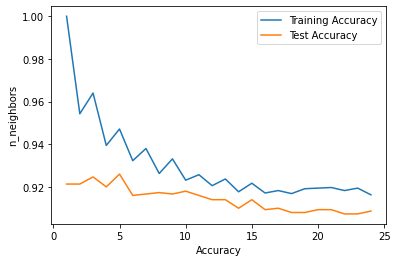

In [47]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,25)
for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors)
  clf.fit(X_train, y_train)

  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Test Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("n_neighbors")
plt.legend()

In [52]:
test_accuracy

[0.9213333333333333,
 0.9213333333333333,
 0.9246666666666666,
 0.92,
 0.926,
 0.916,
 0.9166666666666666,
 0.9173333333333333,
 0.9166666666666666,
 0.918,
 0.916,
 0.914,
 0.914,
 0.91,
 0.914,
 0.9093333333333333,
 0.91,
 0.908,
 0.908,
 0.9093333333333333,
 0.9093333333333333,
 0.9073333333333333,
 0.9073333333333333,
 0.9086666666666666]